## Logistic Regression - (Banknote authentication images) -v2

Performing logistic regression on image dataset. 

In [15]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [16]:
# load dataset
data = pd.read_csv('BankNote_Authentication.csv')

In [17]:
# check dataset dimensions
data.shape

(1372, 5)

In [18]:
# view first few rows
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Separate the data into features and labels

* label: is a result we want (OUTPUT)
* feature: the variables we can use to classify the house price (INPUTs)

In [19]:
# Define labels as (y) and features as (x)

y = data['class']                      # Target variable (label)
X = data.drop(columns=['class'])       # the remaining 20 variables (features)

In [20]:
# check the first 5 observations of all the features
X[0:5]

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


We can see the output above that the median house price is either 0 or 1. As all of the data is already numerical, we don't need to convert them.

In [21]:
# check the first 5 observations of the label
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### Scatterplot

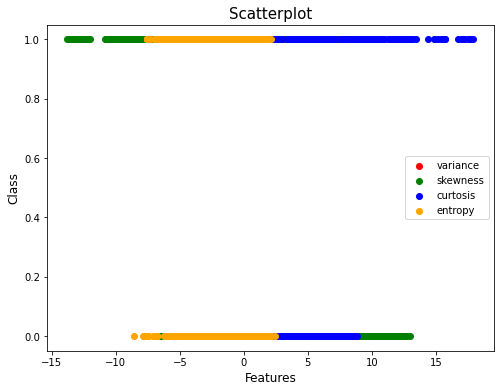

In [22]:
# Plot all the features 

plt.figure(figsize = (8,6))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Class', fontsize=12)
plt.title('Scatterplot', fontsize=15)

pltX = data.loc[:, 'variance']
pltY = data.loc[:, 'class']
plt.scatter(pltX, pltY, color='red', label='variance')

pltX = data.loc[:, 'skewness']
pltY = data.loc[:, 'class']
plt.scatter(pltX, pltY, color='green', label='skewness')

pltX = data.loc[:, 'curtosis']
pltY = data.loc[:, 'class']
plt.scatter(pltX, pltY, color='blue', label='curtosis')

pltX = data.loc[:, 'entropy']
pltY = data.loc[:, 'class']
plt.scatter(pltX, pltY, color='orange', label='entropy')

plt.legend()
plt.show()

In the above plot, we are unable to see 'variance' (red).

### Split data into Train and Test sets

* Train: to train the model
* Test: check how the model performs

In [23]:
# split the features and labels data (70/30 split)

# Test dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)        # Training with TEST

In [24]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)       # fitting on the Train set

LogisticRegression()

In [25]:
# Test the model
predictions = model.predict(X_test)

In [26]:
# View model predictions
print(predictions)

[1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1
 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0
 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0
 0 0 0 0 0]


In [27]:
# View actual values (test set)
print(y_test)

1099    1
389     0
883     1
165     0
579     0
       ..
625     0
505     0
644     0
451     0
311     0
Name: class, Length: 412, dtype: int64


### Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[226,   0],
       [  0, 186]], dtype=int64)

From the confusion matrix, we can see that false positives and false nagatives scored zero. Hence the model is performing with 100% accuracy.

In [31]:
# check precision, recall, f1-Score for both classes
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       186

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412




* Precision: Ratio of correct positve predictions to the total predicted positives

* Recall (Sensitivity): Ratio of correct positive predictions to the total positives

* F1-Score: Model accuracy

From the report, we can see that the model performs very well as the accuracy score for both classes is 100%. 